In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import missingno as mno
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
label_encoder = LabelEncoder()

## Exploratory data Analysis

In [75]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [76]:
df = pd.read_csv('train.csv')
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [77]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [78]:
df_test.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type
count,20000.000000,19250.000000,20000.000000,19917.000000,18858.000000,19257.000000,20000.000000,20000.000000,19108.000000,20000.00000
mean,39.940500,2536.995394,88859.076706,408.462359,2.251246,738.821538,0.189500,501.024500,2534.102003,2.47190
std,16.097618,1415.908803,60007.333673,215.846532,0.953153,72.406504,0.391915,287.537722,1408.509255,1.12551
min,18.000000,368.590000,6185.480000,41.370000,1.000000,580.040000,0.000000,1.000000,368.590000,1.00000
25%,25.000000,1659.722500,40889.030000,250.890000,2.000000,680.300000,0.000000,252.000000,1658.397500,1.00000
50%,40.000000,2224.590000,74565.990000,374.000000,2.000000,739.300000,0.000000,501.000000,2220.605000,2.00000
75%,55.000000,3082.925000,120068.852500,519.570000,3.000000,797.440000,0.000000,748.000000,3082.250000,3.00000
max,65.000000,30427.680000,576335.680000,3305.970000,13.000000,893.830000,1.000000,999.000000,30427.680000,4.00000


In [79]:
## Its clear we have -999 vague values in some features as well, lets clear them as nan, (handled as outliers).

df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].replace(-999, np.nan)
df['Co-Applicant'] = df['Co-Applicant'].replace(-999, np.nan)
df['Property Price'] = df['Property Price'].replace(-999, np.nan)
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].replace(-999, np.nan)

<AxesSubplot:>

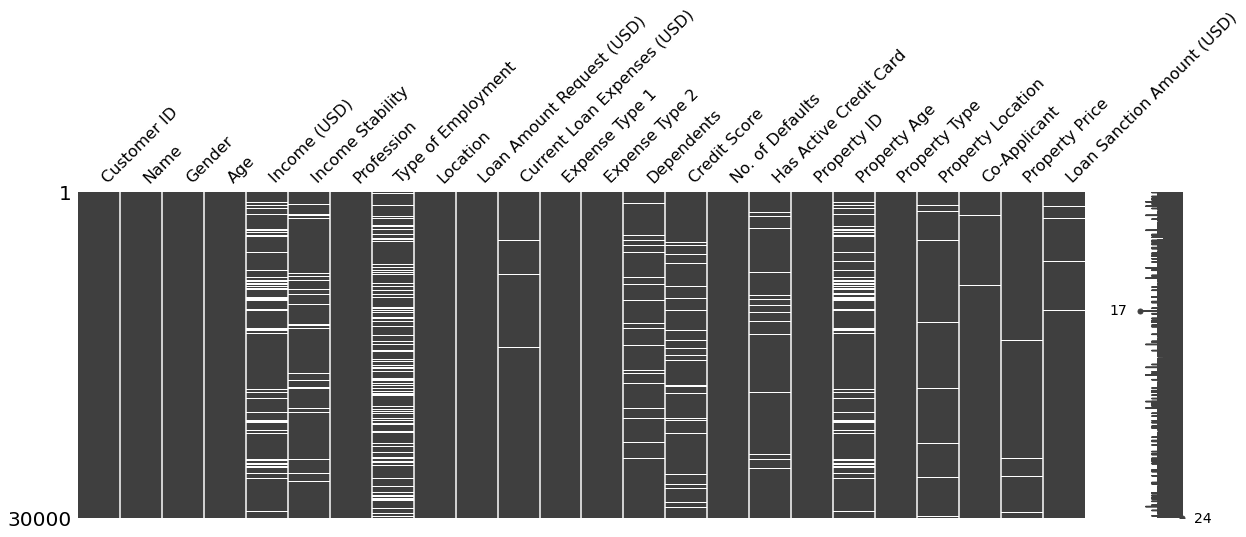

In [80]:
mno.matrix(df, figsize = (20, 6))

<AxesSubplot:>

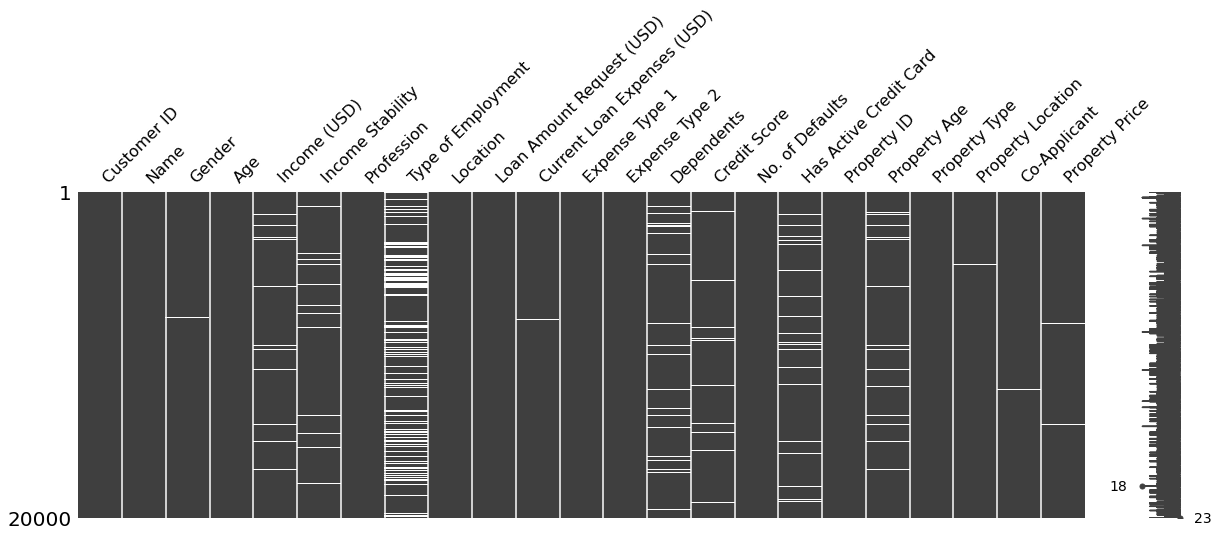

In [81]:
df_test = df_test.replace('?', np.nan)
df_test['Co-Applicant'] = pd.to_numeric(df_test['Co-Applicant'], downcast="float")
df_test['Property Price'] = pd.to_numeric(df_test['Property Price'], downcast="float")

mno.matrix(df_test, figsize=(20, 6))

In [82]:
## Its clear from a little analysis, name, customer ID and property ID are not required for model training.
df = df.drop(columns=['Customer ID', 'Name', 'Property ID'])
df_test = df_test.drop(columns=['Customer ID', 'Name', 'Property ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29947 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 25424 non-null  float64
 3   Income Stability             28317 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Type of Employment           22730 non-null  object 
 6   Location                     30000 non-null  object 
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  29651 non-null  float64
 9   Expense Type 1               30000 non-null  object 
 10  Expense Type 2               30000 non-null  object 
 11  Dependents                   27507 non-null  float64
 12  Credit Score                 28297 non-null  float64
 13  No. of Defaults 

In [83]:
## We also have some missing values lets try to deal with them now.

## Gender lets balance data
df['Gender'].fillna('F', inplace=True)
df_test['Gender'].fillna('M', inplace=True)

## Income based on the correlation its safe to use means as Income doesnot depend much on any other feature
df['Income (USD)'].fillna(df['Income (USD)'].median(), inplace=True)
df_test['Income (USD)'].fillna(df_test['Income (USD)'].median(), inplace=True)

## Dependents dont vary much and are not related to any feature, and thus can be predicted using mean
df['Dependents'].fillna(df['Dependents'].median(), inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].median(), inplace=True)

## Income Stability
df['Income Stability'].fillna(df['Income Stability'].mode()[0], inplace=True)
df_test['Income Stability'].fillna(df_test['Income Stability'].mode()[0], inplace=True)

## Active card not much correlation with nay other feature can be predicted using mode
df['Has Active Credit Card'].fillna(df['Has Active Credit Card'].mode()[0], inplace=True)
df_test['Has Active Credit Card'].fillna(df_test['Has Active Credit Card'].mode()[0], inplace=True)

## Co-applicant has only 2 values which are highly imbalanced lest see is mode can work
df['Co-Applicant'].fillna(df['Co-Applicant'].mode()[0], inplace=True)
df_test['Co-Applicant'].fillna(df_test['Co-Applicant'].mode()[0], inplace=True)

## Property Location is not imbalanced in both train and test so we use mode
df['Property Location'].fillna(df['Property Location'].mode()[0], inplace=True)
df_test['Property Location'].fillna(df['Property Location'].mode()[0], inplace=True)

## Finally we can add mean to null values for following since they have a gaussianc distribution
df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].mean(), inplace=True)
df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].mean(), inplace=True)
df['Property Price'].fillna(df['Property Price'].mean(), inplace=True)

df_test['Current Loan Expenses (USD)'].fillna(df_test['Current Loan Expenses (USD)'].mean(), inplace=True)
df_test['Property Price'].fillna(df_test['Property Price'].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       30000 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Type of Employment           22730 non-null  object 
 6   Location                     30000 non-null  object 
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  30000 non-null  float64
 9   Expense Type 1               30000 non-null  object 
 10  Expense Type 2               30000 non-null  object 
 11  Dependents                   30000 non-null  float64
 12  Credit Score                 28297 non-null  float64
 13  No. of Defaults 

<AxesSubplot:>

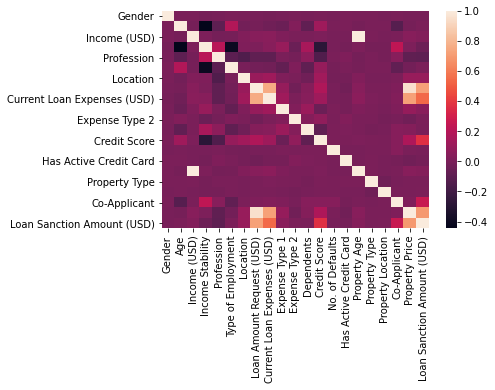

In [84]:
## Check out variable correlations

data = df
data['Type of Employment'] = label_encoder.fit_transform(data['Type of Employment'].astype(str))
data['Profession'] = label_encoder.fit_transform(data['Profession'].astype(str))
data['Location'] = label_encoder.fit_transform(data['Location'].astype(str))
data['Expense Type 1'] = label_encoder.fit_transform(data['Expense Type 1'].astype(str))
data['Expense Type 2'] = label_encoder.fit_transform(data['Expense Type 2'].astype(str))
data['Income Stability'] = label_encoder.fit_transform(data['Income Stability'].astype(str))
data['Gender'] = label_encoder.fit_transform(data['Gender'].astype(str))
data['Has Active Credit Card'] = label_encoder.fit_transform(data['Has Active Credit Card'].astype(str))
data['Property Location'] = label_encoder.fit_transform(data['Property Location'].astype(str))

corr = data.corr()
sns.heatmap(corr)

<AxesSubplot:>

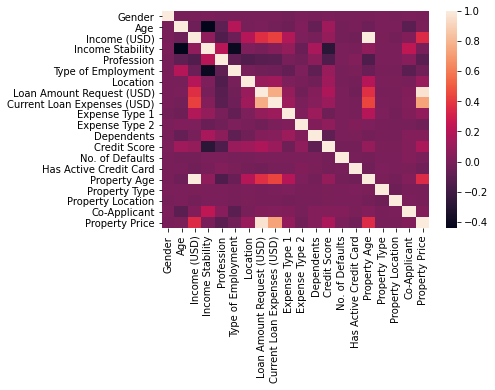

In [85]:
## Check out variable correlations

data = df_test
data['Type of Employment'] = label_encoder.fit_transform(data['Type of Employment'].astype(str))
data['Profession'] = label_encoder.fit_transform(data['Profession'].astype(str))
data['Location'] = label_encoder.fit_transform(data['Location'].astype(str))
data['Expense Type 1'] = label_encoder.fit_transform(data['Expense Type 1'].astype(str))
data['Expense Type 2'] = label_encoder.fit_transform(data['Expense Type 2'].astype(str))
data['Income Stability'] = label_encoder.fit_transform(data['Income Stability'].astype(str))
data['Gender'] = label_encoder.fit_transform(data['Gender'].astype(str))
data['Has Active Credit Card'] = label_encoder.fit_transform(data['Has Active Credit Card'].astype(str))
data['Property Location'] = label_encoder.fit_transform(data['Property Location'].astype(str))

corr = data.corr()
sns.heatmap(corr)

In [86]:
## Clearly type of emp. has a lot of null values is not correlated to the Loan Sanction amount so we can drop it.
## It is also mostly nan in test.csv.

df = df.drop(columns=['Type of Employment'])
df_test = df_test.drop(columns=['Type of Employment'])

In [87]:
## Lets predict the missing credit Score values using LR model

dff = df[['Credit Score', 'Age', 'Income (USD)', 'Income Stability', 'Loan Amount Request (USD)', 'Profession',
          'Current Loan Expenses (USD)', 'Dependents', 'Co-Applicant', 'Property Price', 
          'Loan Sanction Amount (USD)', 'Location']]
dff = dff.dropna()

dfx = dff.drop(['Credit Score'], axis=1)
dfy = dff['Credit Score']

model = linear_model.LinearRegression()
model.fit(X = dfx, y = dfy)

param = ['Age', 'Income (USD)', 'Income Stability', 'Loan Amount Request (USD)', 'Profession',
          'Current Loan Expenses (USD)', 'Dependents', 'Co-Applicant', 'Property Price', 
          'Loan Sanction Amount (USD)', 'Location']

dff = df[['Credit Score', 'Age', 'Income (USD)', 'Income Stability', 'Loan Amount Request (USD)', 'Profession',
          'Current Loan Expenses (USD)', 'Dependents', 'Co-Applicant', 'Property Price', 
          'Loan Sanction Amount (USD)', 'Location']]
df_pred = dff[dff['Credit Score'].isna()]

df_pred = df_pred.drop(columns=['Credit Score'])
predict = model.predict(df_pred)

dff['Credit Score'] = dff['Credit Score'].replace(np.nan, -1)

n = 0
x = []

for i in range(dff.shape[0]):
    if(dff.iloc[i]['Credit Score'] == -1):
        x.append(predict[n])
        n += 1
    
    else:
        x.append(dff.iloc[i]['Credit Score'])

df['Credit Score'] = x
df.info()

/home/lenovo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       30000 non-null  int64  
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  int64  
 4   Profession                   30000 non-null  int64  
 5   Location                     30000 non-null  int64  
 6   Loan Amount Request (USD)    30000 non-null  float64
 7   Current Loan Expenses (USD)  30000 non-null  float64
 8   Expense Type 1               30000 non-null  int64  
 9   Expense Type 2               30000 non-null  int64  
 10  Dependents                   30000 non-null  float64
 11  Credit Score                 30000 non-null  float64
 12  No. of Defaults              30000 non-null  int64  
 13  Has Active Credi

In [88]:
## Lets predict the missing credit Score values using LR model

dff = df_test[['Credit Score', 'Age', 'Income (USD)', 'Income Stability', 'Loan Amount Request (USD)', 'Profession',
          'Current Loan Expenses (USD)', 'Dependents', 'Co-Applicant', 'Property Price', 'Location']]
dff = dff.dropna()

dfx = dff.drop(['Credit Score'], axis=1)
dfy = dff['Credit Score']

model = linear_model.LinearRegression()
model.fit(X = dfx, y = dfy)

param = ['Age', 'Income (USD)', 'Income Stability', 'Loan Amount Request (USD)', 'Profession',
          'Current Loan Expenses (USD)', 'Dependents', 'Co-Applicant', 'Property Price', 'Location']

dff = df_test[['Credit Score', 'Age', 'Income (USD)', 'Income Stability', 'Loan Amount Request (USD)', 'Profession',
          'Current Loan Expenses (USD)', 'Dependents', 'Co-Applicant', 'Property Price', 'Location']]
df_pred = dff[dff['Credit Score'].isna()]

df_pred = df_pred.drop(columns=['Credit Score'])
predict = model.predict(df_pred)

dff['Credit Score'] = dff['Credit Score'].replace(np.nan, -1)

n = 0
x = []

for i in range(dff.shape[0]):
    if(dff.iloc[i]['Credit Score'] == -1):
        x.append(predict[n])
        n += 1
    
    else:
        x.append(dff.iloc[i]['Credit Score'])

df_test['Credit Score'] = x
df_test.info()

/home/lenovo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  int64  
 1   Age                          20000 non-null  int64  
 2   Income (USD)                 20000 non-null  float64
 3   Income Stability             20000 non-null  int64  
 4   Profession                   20000 non-null  int64  
 5   Location                     20000 non-null  int64  
 6   Loan Amount Request (USD)    20000 non-null  float64
 7   Current Loan Expenses (USD)  20000 non-null  float64
 8   Expense Type 1               20000 non-null  int64  
 9   Expense Type 2               20000 non-null  int64  
 10  Dependents                   20000 non-null  float64
 11  Credit Score                 20000 non-null  float64
 12  No. of Defaults              20000 non-null  int64  
 13  Has Active Credi

In [89]:
cols_to_drop = ['Gender', 'Age', 'Expense Type 2', 'Has Active Credit Card', 
                'Property Type', 'Property Location']

df = df.drop(columns=cols_to_drop)
df_test = df_test.drop(columns=cols_to_drop)

In [90]:
## Clearly property age and Income are highly correlated lets see why?
df_tmp = df[['Income (USD)', 'Property Age']]
df_tmp

,Income (USD),Property Age
0,1933.050,1933.05
1,4952.910,4952.91
2,988.190,988.19
3,2222.435,NaN
4,2614.770,2614.77
...,...,...
29995,4969.410,4969.41
29996,1606.880,1606.88
29997,2222.435,NaN
29998,2417.710,2417.71


In [91]:
## Clearly they have the same values and one must be eleminated to avoid overfitting.
## We choose to remove property Age based on its p value.

df = df.drop(columns=['Property Age'])
df_test = df_test.drop(columns=['Property Age'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income (USD)                 30000 non-null  float64
 1   Income Stability             30000 non-null  int64  
 2   Profession                   30000 non-null  int64  
 3   Location                     30000 non-null  int64  
 4   Loan Amount Request (USD)    30000 non-null  float64
 5   Current Loan Expenses (USD)  30000 non-null  float64
 6   Expense Type 1               30000 non-null  int64  
 7   Dependents                   30000 non-null  float64
 8   Credit Score                 30000 non-null  float64
 9   No. of Defaults              30000 non-null  int64  
 10  Co-Applicant                 30000 non-null  float64
 11  Property Price               30000 non-null  float64
 12  Loan Sanction Amount (USD)   30000 non-null  float64
dtypes: float64(8), i

In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income (USD)                 20000 non-null  float64
 1   Income Stability             20000 non-null  int64  
 2   Profession                   20000 non-null  int64  
 3   Location                     20000 non-null  int64  
 4   Loan Amount Request (USD)    20000 non-null  float64
 5   Current Loan Expenses (USD)  20000 non-null  float64
 6   Expense Type 1               20000 non-null  int64  
 7   Dependents                   20000 non-null  float64
 8   Credit Score                 20000 non-null  float64
 9   No. of Defaults              20000 non-null  int64  
 10  Co-Applicant                 20000 non-null  float32
 11  Property Price               20000 non-null  float32
dtypes: float32(2), float64(5), int64(5)
memory usage: 1.7 MB


In [94]:
# df.to_csv('processed_dataset5.csv')
data = pd.read_csv('processed_dataset5.csv', index_col=[0])
data.head()

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,1933.050,1,7,1,72809.58,241.08,0,3.0,809.44,0,1.0,119933.46,54607.18
1,4952.910,1,7,1,46837.47,495.81,0,1.0,780.40,0,1.0,54791.00,37469.98
2,988.190,0,3,1,45593.04,171.95,0,1.0,833.15,0,0.0,72440.58,36474.43
3,2222.435,0,3,0,80057.92,298.54,0,2.0,832.70,1,1.0,121441.51,56040.54
4,2614.770,1,7,1,113858.89,491.41,0,2.0,745.55,1,1.0,208567.91,74008.28


In [95]:
data.shape

(30000, 13)

In [96]:
# df_test.to_csv('processed_test5.csv')
data_test = pd.read_csv('processed_test5.csv', index_col=[0])
data_test.head()

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price
0,3472.69,1,0,1,137088.98,396.72,0,2.0,799.140000,0,1.0,236644.50
1,1184.84,1,6,0,104771.59,463.76,1,2.0,833.310000,0,1.0,142357.30
2,1266.27,1,6,1,176684.91,493.15,0,3.0,627.440000,0,1.0,300991.25
3,1369.72,0,2,0,97009.18,446.15,0,2.0,833.200000,0,0.0,125612.10
4,1939.23,0,2,2,109980.00,370.10,0,2.0,834.280821,0,1.0,180908.00


In [97]:
data_test.shape

(20000, 12)

In [98]:
tmp = data.copy()
features = tmp.columns
for i in features:
    if 0 in np.unique(tmp[i]) or i == 'Loan Sanction Amount (USD)':
        pass
    else:
        tmp[i] = np.log(tmp[i])

data = tmp
data.head()

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,7.566854,1,7,1,11.195603,5.485129,0,1.098612,6.696343,0,1.0,11.694692,54607.18
1,8.507731,1,7,1,10.754439,6.206193,0,0.000000,6.659807,0,1.0,10.911281,37469.98
2,6.895875,0,3,1,10.727510,5.147204,0,0.000000,6.725214,0,0.0,11.190522,36474.43
3,7.706359,0,3,0,11.290506,5.698904,0,0.693147,6.724673,1,1.0,11.707188,56040.54
4,7.868931,1,7,1,11.642715,6.197279,0,0.693147,6.614122,1,1.0,12.248020,74008.28


In [99]:
tmp = data_test.copy()
features = tmp.columns
for i in features:
    if(0 in np.unique(tmp[i])):
        pass
    else:
        tmp[i] = np.log(tmp[i])

data_test = tmp
data_test.head()

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price
0,8.152685,1,0,1,11.828385,5.983231,0,0.693147,6.683536,0,1.0,12.374314
1,7.077363,1,6,0,11.559538,6.139367,1,0.693147,6.725406,0,1.0,11.866095
2,7.143831,1,6,1,12.082123,6.200813,0,1.098612,6.441648,0,1.0,12.614836
3,7.222362,0,2,0,11.482561,6.100655,0,0.693147,6.725274,0,0.0,11.740954
4,7.570046,0,2,2,11.608054,5.913773,0,0.693147,6.726570,0,1.0,12.105744


In [100]:
df_train, df_test = train_test_split(data, test_size=0.2)

print(df_train.shape)
print(df_test.shape)

(24000, 13)
(6000, 13)


In [101]:
df_test.head()

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
22039,7.706359,1,1,0,10.504308,5.559065,1,1.386294,6.591248,0,1.0,10.936992,23706.98
18526,8.323640,1,1,2,11.997689,6.233705,1,0.693147,6.706043,0,1.0,12.395123,113665.36
29676,8.367070,1,7,2,12.295142,6.494026,0,0.693147,6.419669,0,0.0,12.869077,0.00
29662,8.404459,1,7,1,11.123631,5.941723,0,0.000000,6.732044,0,1.0,11.274700,54202.75
4117,7.706359,1,7,1,10.962717,6.014433,0,0.000000,6.545364,0,1.0,11.417304,37493.94


In [102]:
X_train = df_train.drop(['Loan Sanction Amount (USD)'], axis=1)
y_train = df_train['Loan Sanction Amount (USD)']

print(X_train.shape, y_train.shape)

(24000, 12) (24000,)


In [103]:
X_train.head()

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price
16539,7.556804,1,1,2,10.300698,5.826973,1,0.693147,6.730660,0,0.0,10.648413
28596,7.799815,1,1,1,12.224331,6.396696,1,1.098612,6.728880,0,1.0,12.646693
2938,9.023277,1,1,2,11.533291,6.315123,1,0.693147,6.580667,0,1.0,11.800627
11218,7.339278,1,7,1,11.295265,5.724173,0,0.693147,6.696120,0,1.0,11.802697
23273,7.218243,1,4,0,10.070640,4.906237,0,1.609438,6.481945,0,1.0,10.411723


In [132]:
import xgboost
clf = xgboost.XGBRFRegressor()
clf.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [106]:
df_test.head()

,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
22039,7.706359,1,1,0,10.504308,5.559065,1,1.386294,6.591248,0,1.0,10.936992,23706.98
18526,8.323640,1,1,2,11.997689,6.233705,1,0.693147,6.706043,0,1.0,12.395123,113665.36
29676,8.367070,1,7,2,12.295142,6.494026,0,0.693147,6.419669,0,0.0,12.869077,0.00
29662,8.404459,1,7,1,11.123631,5.941723,0,0.000000,6.732044,0,1.0,11.274700,54202.75
4117,7.706359,1,7,1,10.962717,6.014433,0,0.000000,6.545364,0,1.0,11.417304,37493.94


In [107]:
y_test = df_test['Loan Sanction Amount (USD)']
df_test = df_test.drop(['Loan Sanction Amount (USD)'], axis=1)
y_pred = clf.predict(df_test)

In [108]:
y_test = y_test.values
y_test

array([ 23706.98, 113665.36,      0.  , ...,  79490.36,  78261.44,
        73902.37])

In [109]:
y_pred

array([ 25155.53 , 113221.28 ,   2153.473, ...,  70052.14 ,  64219.73 ,
        64994.793], dtype=float32)

In [110]:
mean_absolute_error(y_test, y_pred)

11661.678511736713

In [111]:
final_pred = clf.predict(data_test)
final_pred

array([89518.664 , 67018.27  ,  1469.0096, ...,  4246.9116, 61323.75  ,
       49920.785 ], dtype=float32)

In [112]:
final_pred.shape

(20000,)

In [113]:
dataset = pd.DataFrame(pd.read_csv('test.csv')['Customer ID'])
dataset['Loan Sanction Amount (USD)'] = final_pred
dataset.columns = ['Customer ID', 'Loan Sanction Amount (USD)']
dataset.to_csv('sample_submission.csv', index=False)

In [114]:
result = pd.read_csv('sample_submission.csv')
result

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,89518.6640
1,C-35067,67018.2700
2,C-34590,1469.0096
3,C-16668,55521.1760
4,C-12196,70048.0400
...,...,...
19995,C-9076,103145.1400
19996,C-17587,34558.1200
19997,C-46479,4246.9116
19998,C-3099,61323.7500
